<a href="https://colab.research.google.com/github/anushavasup/imageclassification_flowers/blob/main/flowers_multiclass_augmentation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
from zipfile import ZipFile
file_name = '/content/drive/MyDrive/flowers.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split



In [5]:
import tensorflow as tf
from tensorflow.keras import layers
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(32, 
                                                              32,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [6]:
import glob 
import cv2
from skimage.transform import resize
folders=['daisy','dandelion','rose','sunflower','tulip']
X=[]#feature dataset
y=[]#target data set
#loop through everyfolder
for folder in folders:
  path='/content/flowers/'+folder+'/*.jpg'
  files=glob.glob(path)
  for myfile in files:
    image=cv2.imread(myfile)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=resize(image,(32,32,3))
    
    X.append(image)
    y.append(folder)
    #print(image.shape)
    image = tf.expand_dims(image, 0)
    augmented_image=data_augmentation(image)
    augmented_image=tf.reshape(augmented_image,(32,32,3))
    #print(augmented_image)
    X.append(augmented_image)
    y.append(folder)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.preprocessing import LabelEncoder
y_train=LabelEncoder().fit_transform(y_train)
y_test=LabelEncoder().fit_transform(y_test)
print(y_train)


[4 3 3 ... 3 0 4]


In [9]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
#X_train1=tf.convert_to_tensor(X_train)

X_train1=np.array(X_train)
X_test1=np.array(X_test)
print(type(X_train1))
print(np.max(X_train1[3]))
X_train1.shape

<class 'numpy.ndarray'>
0.9914843440055847


(6907, 32, 32, 3)

In [21]:
# Creating a Sequential model
from keras.layers.normalization import BatchNormalization
model_flower= Sequential()
#model.add(data_augmentation)
model_flower.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(32,32,3)))
model_flower.add(Dropout(0.2))
model_flower.add(BatchNormalization())

model_flower.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model_flower.add(MaxPool2D(2,2))
model_flower.add(BatchNormalization())
model_flower.add(Dropout(0.2))

model_flower.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model_flower.add(MaxPool2D(2,2))
model_flower.add(BatchNormalization())
model_flower.add(Dropout(0.2))

model_flower.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model_flower.add(BatchNormalization())
model_flower.add(Dropout(0.2))

model_flower.add(Flatten())

model_flower.add(Dense(32,activation='relu'))
model_flower.add(Dropout(0.2))
model_flower.add(Dense(16,activation='relu'))
#model_flower.add(Dense(32,activation='relu'))

model_flower.add(Dense(5,activation = 'softmax'))

    
model_flower.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )


In [30]:
# Model Summary
model_flower.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_13 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 30)        8670      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 30)        8130      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 30)         

In [22]:
# Training the model
history = model_flower.fit(X_train1,y_train_one_hot,epochs=100,batch_size=32,validation_split=0.5)

Epoch 1/100
108/108 [==============================] - 29s 140ms/step - loss: 1.7456 - acc: 0.2746 - val_loss: 1.7947 - val_acc: 0.2487
Epoch 2/100
108/108 [==============================] - 15s 135ms/step - loss: 1.3514 - acc: 0.4293 - val_loss: 2.1899 - val_acc: 0.2487
Epoch 3/100
108/108 [==============================] - 14s 134ms/step - loss: 1.2173 - acc: 0.5001 - val_loss: 1.7636 - val_acc: 0.2768
Epoch 4/100
108/108 [==============================] - 15s 136ms/step - loss: 1.1592 - acc: 0.5335 - val_loss: 1.6428 - val_acc: 0.3159
Epoch 5/100
108/108 [==============================] - 14s 132ms/step - loss: 1.0735 - acc: 0.5577 - val_loss: 1.7110 - val_acc: 0.3347
Epoch 6/100
108/108 [==============================] - 14s 131ms/step - loss: 1.0408 - acc: 0.5830 - val_loss: 1.1815 - val_acc: 0.5067
Epoch 7/100
108/108 [==============================] - 14s 132ms/step - loss: 1.0055 - acc: 0.6106 - val_loss: 1.2458 - val_acc: 0.4710
Epoch 8/100
108/108 [===========================

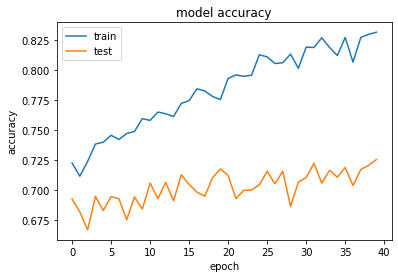

In [23]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

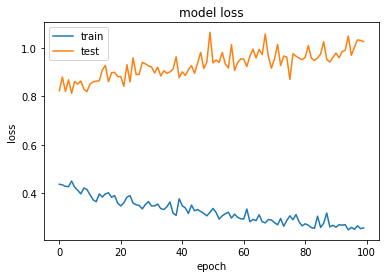

In [33]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
model_flower.evaluate(X_test1,y_test_one_hot)

54/54 [==============================] - 1s 20ms/step - loss: 1.0738 - acc: 0.7197


[1.0738041400909424, 0.7197452187538147]

In [35]:
#Let’s test the model by loading a new image.
from google.colab import files
uploaded=files.upload()

Saving redrose.jpg to redrose.jpg


daisy : 0.45 %
dandelion : 0.01 %
rose : 92.8 %
sunflower : 0.01 %
tulip : 6.72 %


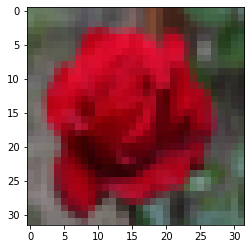

In [37]:
new_image=plt.imread("/content/redrose.jpg")
plt.imshow(new_image)
from skimage.transform import resize
import numpy as np
new_resize=resize(new_image,(32,32,3))
plt.imshow(new_resize)
probabilities=model_flower.predict(np.array([new_resize,]))
i=0
for i in range(5):
  print(folders[i],':',round(probabilities[0][i]*100,2),"%")

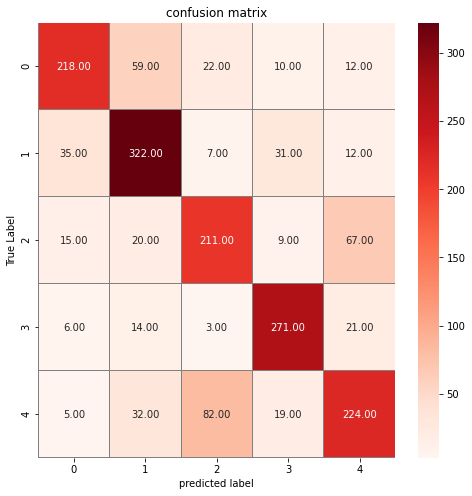

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=model_flower.predict(X_test1)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test_one_hot,axis=1)
confusion_mtx=confusion_matrix(y_true,y_pred_classes)
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()
